In [74]:
import pulsestreamer
import pyvisa
import numpy as np
import sys
from importlib import reload
import matplotlib.pyplot as plt

directory_path = "C:\\Users\\Li_Lab_B12\\Desktop\\DataSumukh\\250731_PythonCode\\dev"
sys.path.append(directory_path)

import ODMR
reload(ODMR)

<module 'ODMR' from 'C:\\Users\\Li_Lab_B12\\Desktop\\DataSumukh\\250731_PythonCode\\dev\\ODMR.py'>

In [79]:
# Initialize all the instruments
pulsestreamer_ip = '192.168.0.100'
ps = pulsestreamer.PulseStreamer(pulsestreamer_ip)
ps.reset()

rm = pyvisa.ResourceManager()
sg386 = rm.open_resource('GPIB0::27::INSTR')
sg386.write('ENBR 1')

# 2. Create different experiment classes using same instruments
odmr_config = {
    # Measurement parameters
    'scale': 8,
    'samples_per_axis': 151,
    'position':[75,75], # [x,y] position to fix the beam at
    'freq': 3.45e9, # in Hz. 
    'mw_power': -17, # in dBm
    'num_avgs':1,
    
    # Other parameters
    'pulse_sequence': 'cw_odmr',
    'aomvolt': 0.5,
    'pulsenum': 3000,
    'count_t': 0.05*1e6,  # All times are in NANOSeconds!!!
    'separation_t': 0.02*1e6,
    'addl_t': 0.01*1e6,
    'wait_t': 0.01*1e6,
    'seqplot': False,
}




Connect to Pulse Streamer via JSON-RPC.
IP / Hostname: 192.168.0.100
Pulse Streamer 8/2 firmware: v1.7.2
Client software: v1.7.0


Initialize the measurement class instance. 
I'll call it odmr. You can call it anything, e.g. Jim

In [80]:
odmr = ODMR.ODMR(odmr_config, ps=ps, sg386=sg386, rm=rm)

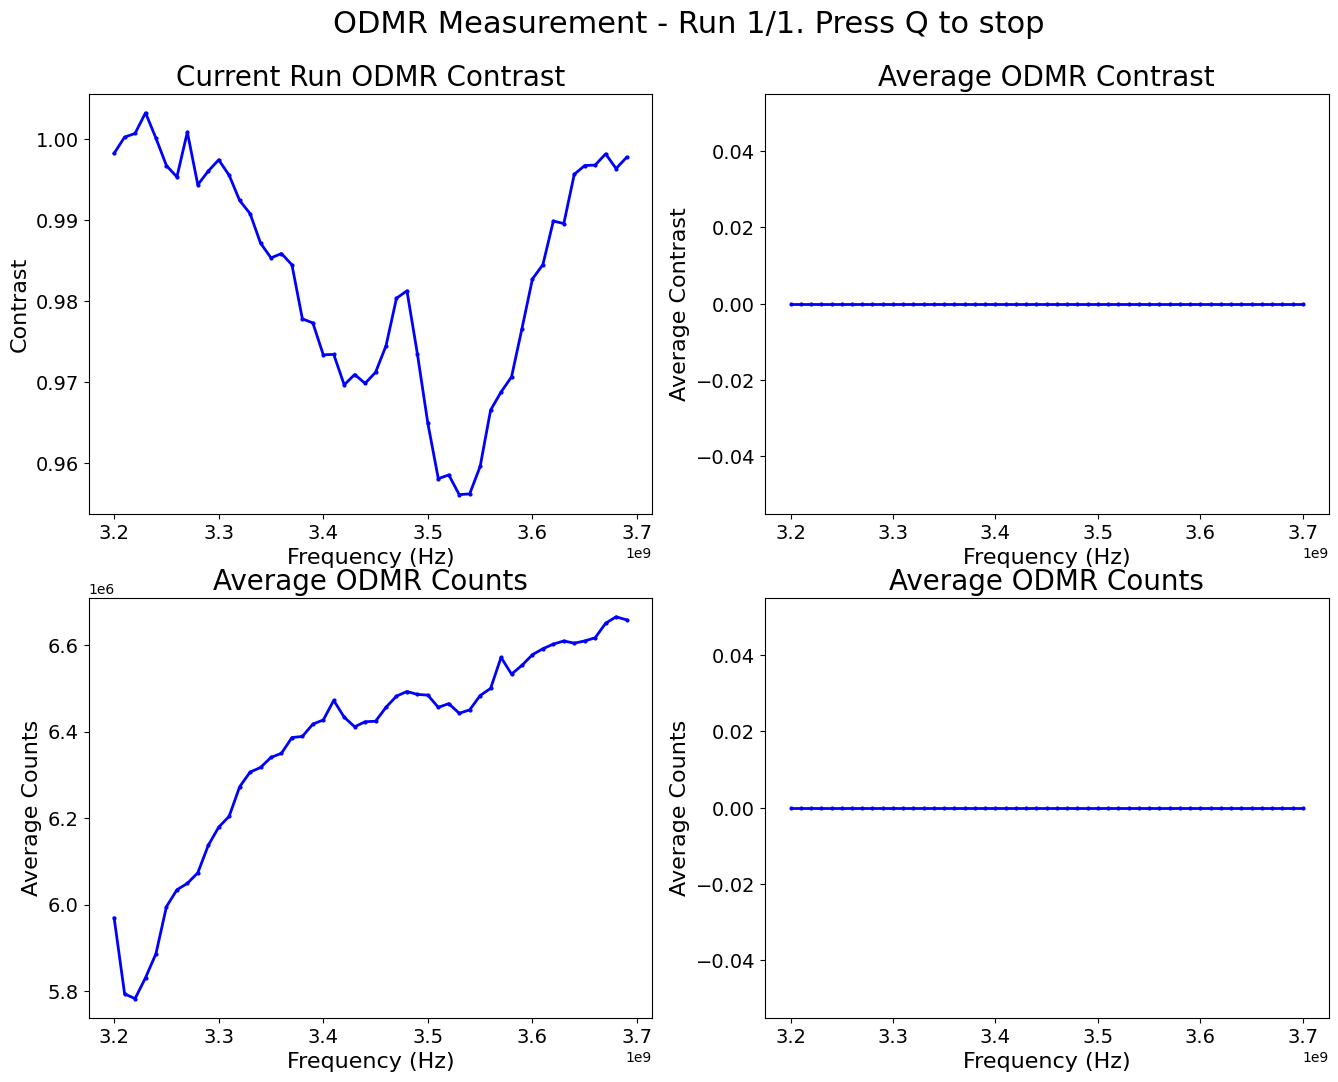

100%|██████████| 1/1 [00:27<00:00, 27.87s/it]


In [76]:
# 3. Run ODMR experiment
freqs = np.linspace(3.2e9, 3.7e9, num = 51)
freq_range, avg_contrast, all_contrast, avg_counts, all_counts = odmr.run_frequency_sweep(freqs)


In [51]:
# 5. Close instruments when completely done
sg386.close()
rm.close()

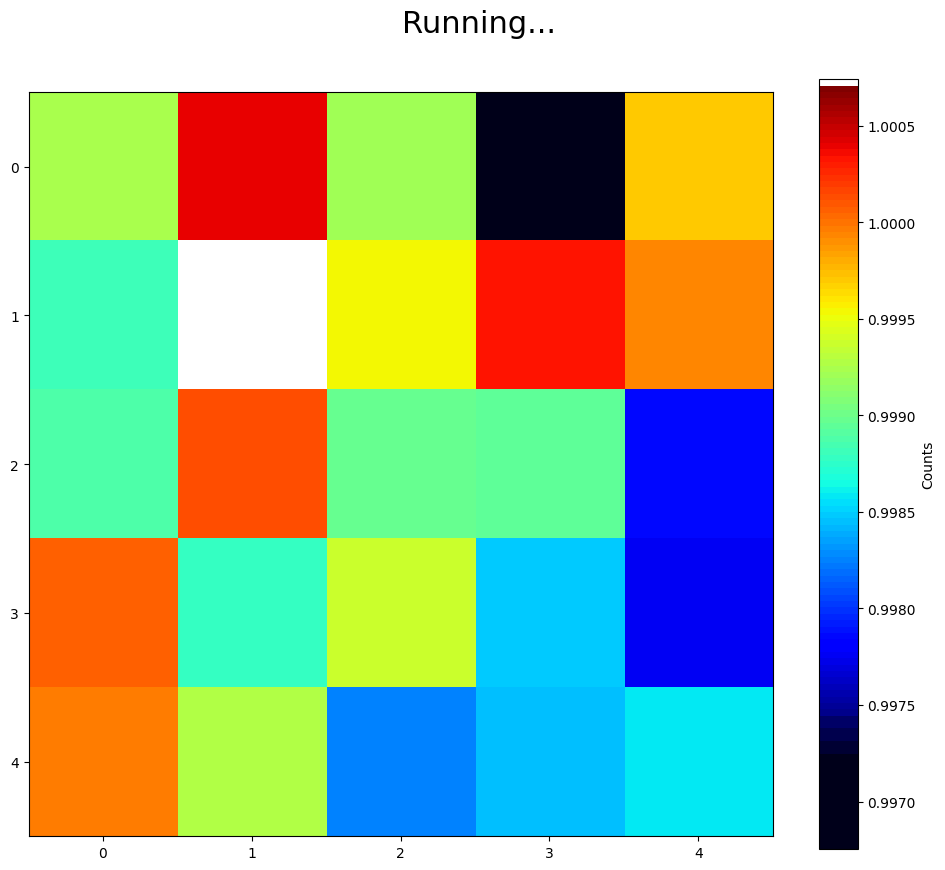

Best Contrast =  1.0004064932030357


In [136]:
odmr.peakfinder_ODMR(odmr_config, window=5, plotting=True)

### Rabi Oscillation Code example

In [81]:
rabi_config = {
    # Measurement parameters
    'scale': 8,
    'samples_per_axis': 151,
    'position':[75,75], # [x,y] position to fix the beam at
    'freq': 3.45e9, # in Hz. 
    'mw_power': 0, # in dBm
    'num_avgs':5,
    
    # Other parameters
    'pulse_sequence': 'rabi',
    'aomvolt': 0.5,
    'pulsenum': 30000,
    'init_t': 7000, # All times are in NANOSeconds!!!
    'wait_t': 700,
    'delay_t': 900,
    'readout_t': 3000,
    'seqplot': False,
}
odmr.update_config(**rabi_config)

Updated config: {'scale': 8, 'samples_per_axis': 151, 'position': [75, 75], 'freq': 3450000000.0, 'mw_power': 0, 'num_avgs': 5, 'pulse_sequence': 'rabi', 'aomvolt': 0.5, 'pulsenum': 30000, 'init_t': 7000, 'wait_t': 700, 'delay_t': 900, 'readout_t': 3000, 'seqplot': False}


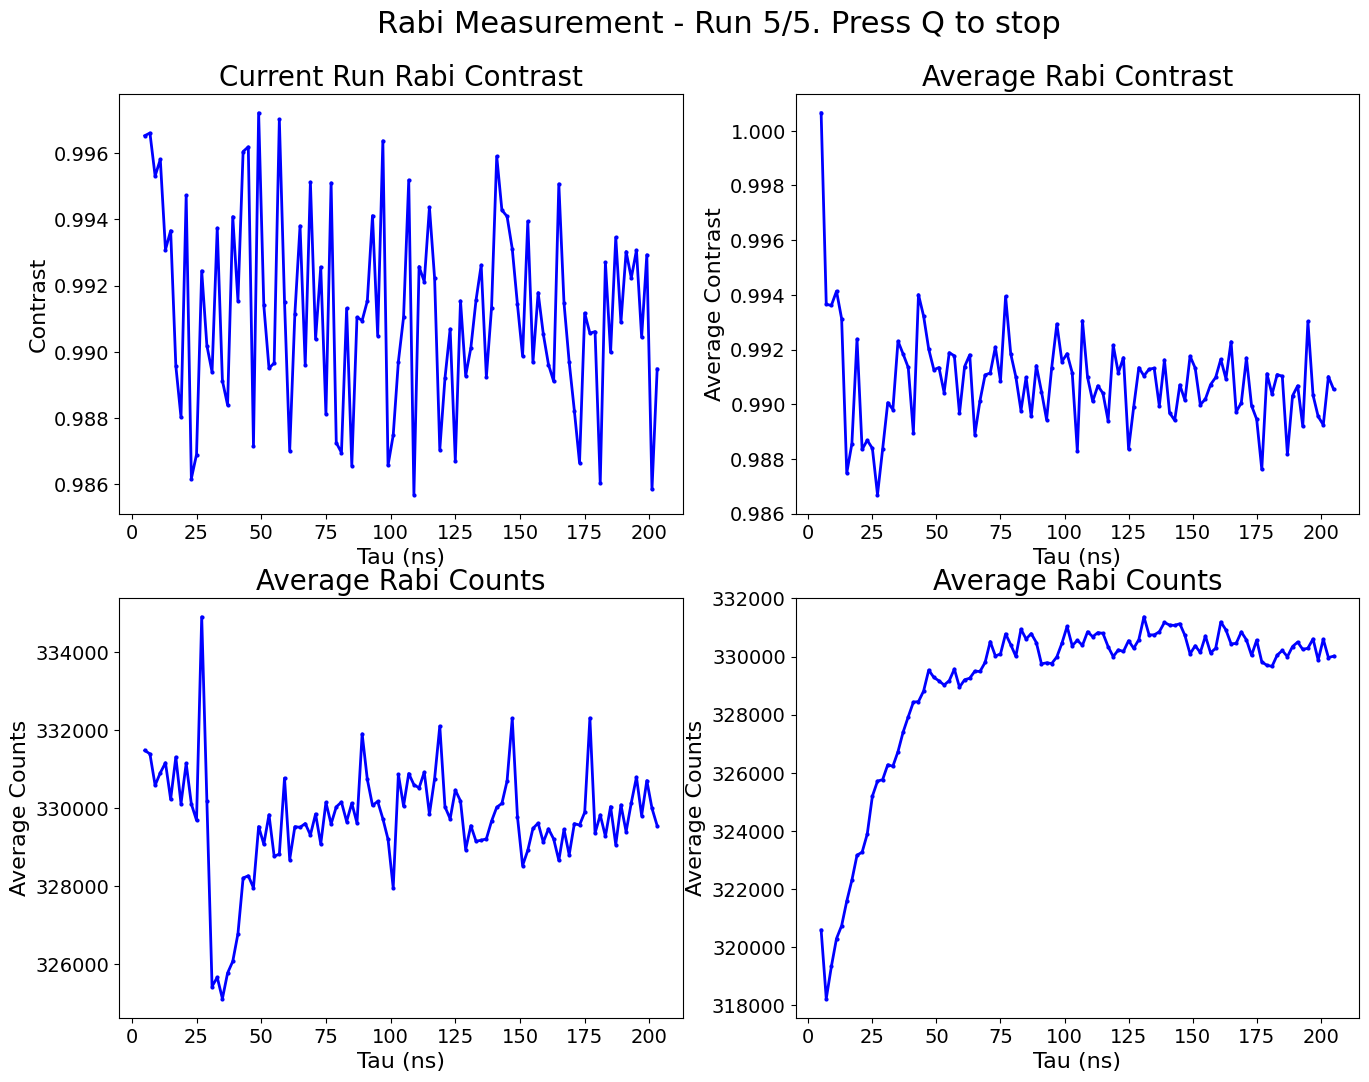

100%|██████████| 5/5 [05:38<00:00, 67.75s/it]


In [73]:

tau_range = np.linspace(5, 5 + 2 * 100, num=101) # in ns. Start and step taus are given here.
taus, avg_contrast, all_contrast, avg_counts, all_counts = odmr.run_rabi_sweep(tau_range)

In [78]:
odmr.config

{'scale': 8,
 'samples_per_axis': 151,
 'position': [75, 75],
 'freq': 3450000000.0,
 'mw_power': 0,
 'num_avgs': 5,
 'pulse_sequence': 'rabi',
 'aomvolt': 0.5,
 'pulsenum': 30000,
 'count_t': 50000.0,
 'separation_t': 20000.0,
 'addl_t': 10000.0,
 'wait_t': 700,
 'seqplot': False,
 'init_t': 7000,
 'delay_t': 900,
 'readout_t': 3000}